# Face recognition

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# image dimensions, set as per your preference.
img_width, img_height = 150, 150

## Prepare Training

In [22]:
# For GOOGLE COLAB
# ==========
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)
# train_data_dir = "/content/drive/MyDrive/Colab Notebooks/train"
# validation_data_dir = "/content/drive/MyDrive/Colab Notebooks/validation"


Mounted at /content/drive


In [ ]:
# For OS
# ==========
# import os
# d = os.path.dirname(os.getcwd())
# train_data_dir = os.path.join(d, "data/model_3/train")
# validation_data_dir = os.path.join(d, "data/model_3/validation")

In [37]:
batch_size = 10
nb_train_samples = 140
nb_validation_samples = 65
epochs = 40

train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width, img_height),batch_size=batch_size, class_mode='binary')

Found 140 images belonging to 1 classes.
Found 65 images belonging to 1 classes.


## Create Model

In [38]:
model = Sequential()
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [39]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

import time
start_time = time.time()
hist = model.fit(train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=epochs,
validation_data=validation_generator, validation_steps=nb_validation_samples // batch_size)
end_time = time.time()

print("###### Total Time Taken: ", round((end_time - start_time)/60), 'Minutes ######')

Epoch 1/40
14/14 [==============================] - 8s 520ms/step - loss: 0.0498 - accuracy: 0.9571 - val_loss: 1.8522e-10 - val_accuracy: 1.0000
Epoch 2/40
14/14 [==============================] - 7s 490ms/step - loss: 2.3212e-07 - accuracy: 1.0000 - val_loss: 1.1828e-10 - val_accuracy: 1.0000
Epoch 3/40
14/14 [==============================] - 7s 481ms/step - loss: 4.6853e-07 - accuracy: 1.0000 - val_loss: 4.3937e-11 - val_accuracy: 1.0000
Epoch 4/40
14/14 [==============================] - 7s 482ms/step - loss: 2.6062e-06 - accuracy: 1.0000 - val_loss: 1.3797e-12 - val_accuracy: 1.0000
Epoch 5/40
14/14 [==============================] - 7s 510ms/step - loss: 7.0094e-06 - accuracy: 1.0000 - val_loss: 8.2234e-17 - val_accuracy: 1.0000
Epoch 6/40
14/14 [==============================] - 7s 486ms/step - loss: 7.7081e-10 - accuracy: 1.0000 - val_loss: 7.8875e-17 - val_accuracy: 1.0000
Epoch 7/40
14/14 [==============================] - 7s 488ms/step - loss: 1.6628e-10 - accuracy: 1.0000 

[]

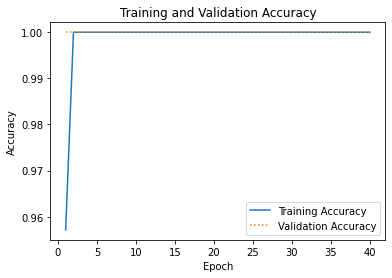

In [40]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()